<a href="https://colab.research.google.com/github/LinaBaniOudeh/TASK1_DCT/blob/main/1172351Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Zigzag scan of a matrix

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element    	
        	output[i] = input[v, h] 
        	break

 
    return output




# Inverse zigzag scan of a matrix


def inverse_zigzag(input, vmax, hmax):
	
	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)):    	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other case
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element 	
			output[v, h] = input[i] 
			break


	return output

To visualize and measure the effect of quantization, in the following code we will apply quantization to the DCT coefficients. We will also compute the Mean Square Error (MSE) and Peak Signal to Noise Ratio (PSNR) between the original and reconstructed images.

In [4]:
def compress_DCT(QUANTIZATION_MAT):
 # reading image in grayscale style
 img = cv2.imread('drive/My Drive/Data/kitten.jpg', cv2.IMREAD_GRAYSCALE)

 # defining block size
 block_size = 8




 # Quantization Matrix  Q50
 #QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])



 # Quantization Matrix  Q10
 #QUANTIZATION_MAT = np.array([[80,60,50,80,120,200,255,255],[55,60,70,95,130,255,255,255],[70,65,80,120,200,255,255,255 ],[70,85,110,145,255,255,255,255],[90,110,185,255,255,255,255,255],[120,175,255,255,255,255,255,255],[245,255,255,255,255,255,255,255],[255,255,255,255,255,255,255,255]])



# get size of the image
 [h , w] = img.shape



 # No of blocks needed : Calculation
 height = h
 width = w
 h = np.float32(h) 
 w = np.float32(w) 

 nbh = math.ceil(h/block_size)
 nbh = np.int32(nbh)

 nbw = math.ceil(w/block_size)
 nbw = np.int32(nbw)


 # Pad the image, because sometime image size is not dividable to block size
 # get the size of padded image by multiplying block size by number of blocks in height/width

 # height of padded image
 H =  block_size * nbh

 # width of padded image
 W =  block_size * nbw

 # create a numpy zero matrix with size of H,W
 padded_img = np.zeros((H,W))
 padded_img_DCT = np.zeros((H,W))
 padded_img_DCT_Q = np.zeros((H,W))
 orig_img = np.zeros((H,W))

 #copy the values of img into padded_img[0:h,0:w]
 for i in range(height):
         for j in range(width):
                 pixel = img[i,j]
                 padded_img[i,j] = pixel



 cv2.imwrite('uncompressed.bmp', np.uint8(padded_img))
 cv2_imshow(np.uint16(padded_img))

 cv2.imwrite('uncompressed.bmp', np.uint8(orig_img))

 # divide image into block size by block size (here: 8-by-8) blocks
 # To each block apply 2D discrete cosine transform
 # reorder DCT coefficients in zig-zag order
 # reshaped it back to block size by block size (here: 8-by-8)

 # initialisation of compressed image
 recomp_img = np.zeros((H,W))

 for i in range(nbh):
    
        # Compute start and end row index of the block
        row_ind_1 = i*block_size                
        row_ind_2 = row_ind_1+block_size
        
        for j in range(nbw):
            
            # Compute start & end column index of the block
            col_ind_1 = j*block_size                       
            col_ind_2 = col_ind_1+block_size
                        
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
                       
            # apply 2D discrete cosine transform to the selected block                       
            DCT = cv2.dct(block)            

            # copy reshaped matrix into padded_img on current block corresponding indices
            padded_img_DCT[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = DCT

            #DCT_normalized = cv2.idct(DCT).astype(int) ; # without Quantization
            DCT_normalized = np.divide(DCT,QUANTIZATION_MAT).astype(int) # with Quantization       
           

            # reorder DCT coefficients in zig zag order by calling zigzag function
            # it will give you a one dimentional array
            reordered = zigzag(DCT_normalized)

            # reshape the reorderd array back to (block size by block size) (here: 8-by-8)
            reshaped= np.reshape(reordered, (block_size, block_size)) 
            
            # copy reshaped matrix into padded_img on current block corresponding indices
            padded_img_DCT_Q[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped

            block = inverse_zigzag(reshaped.flatten(), int(block_size),int(block_size))            
            de_quantized = np.multiply(block,QUANTIZATION_MAT)                
            recomp_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = cv2.idct(de_quantized) 


 cv2_imshow(np.uint16(padded_img_DCT))

 cv2_imshow(np.uint16(padded_img_DCT_Q))

 cv2_imshow(np.uint16(recomp_img))




 cv2.waitKey(0)
 cv2.destroyAllWindows()

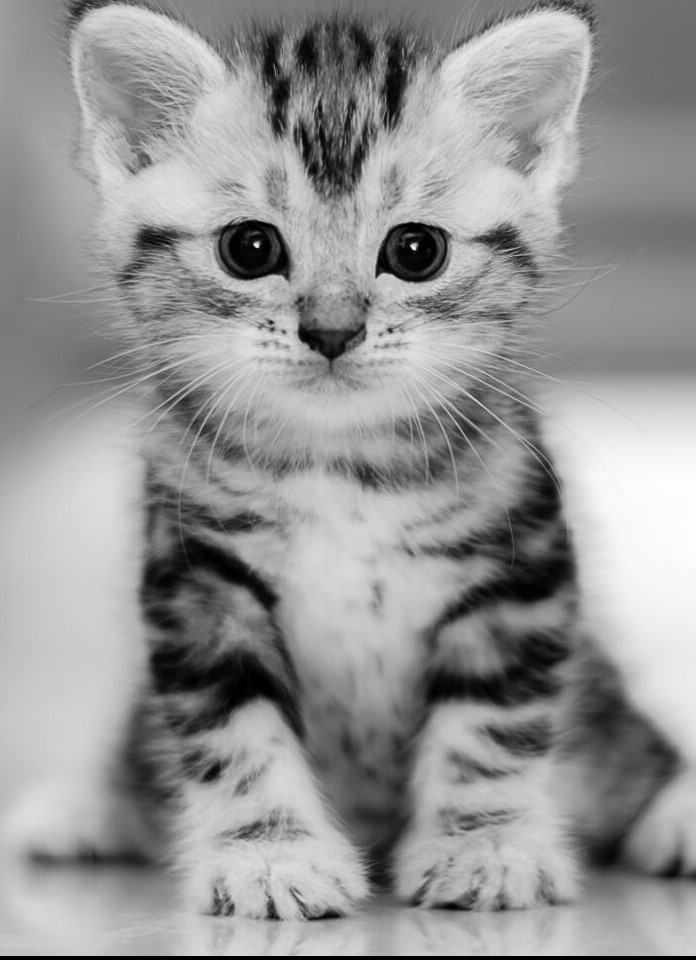

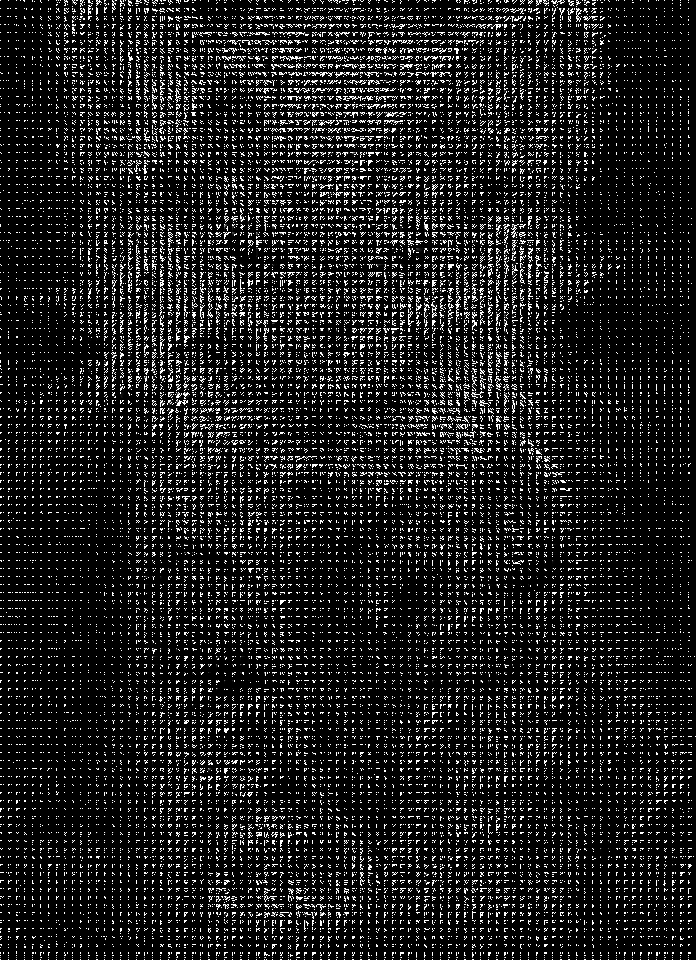

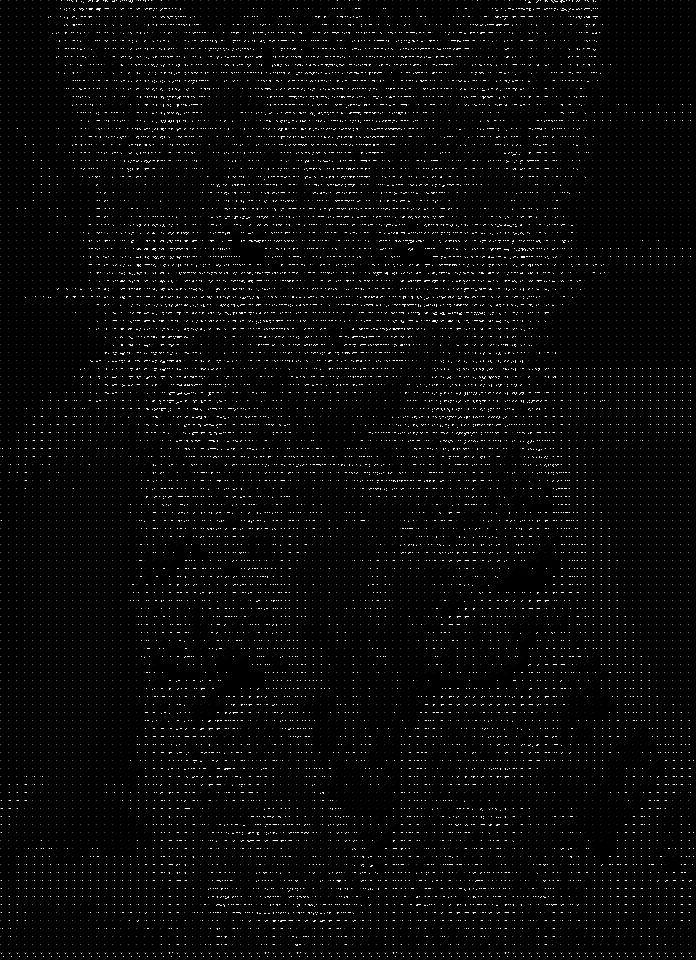

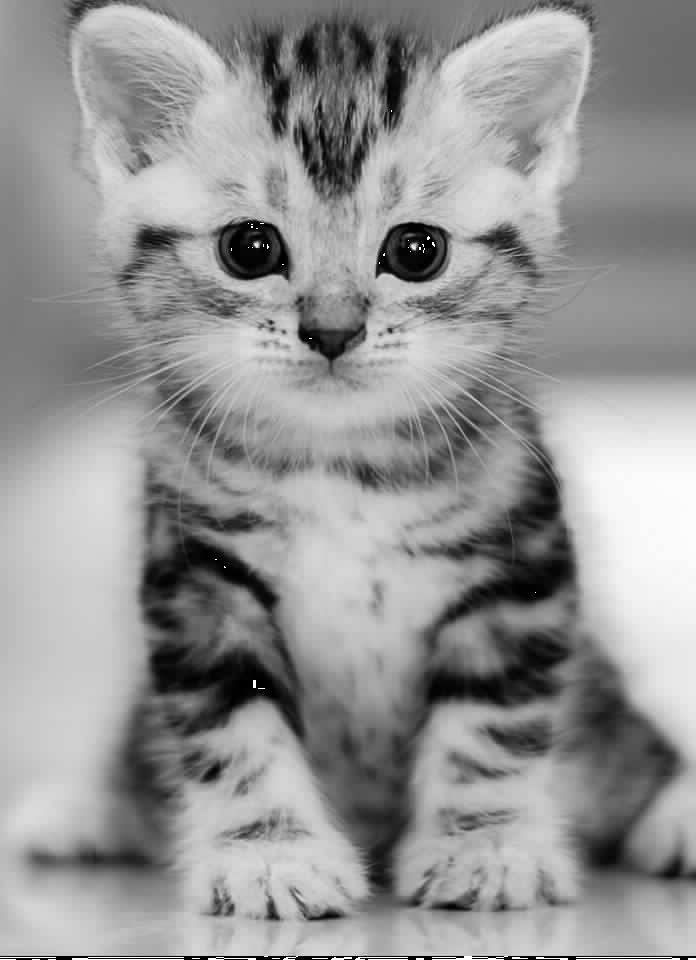

In [5]:
# Quantization Matrix  Q50
QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])
compress_DCT(QUANTIZATION_MAT)


In [ ]:
# Quantization Matrix  Q50
QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])
compress_DCT(QUANTIZATION_MAT)

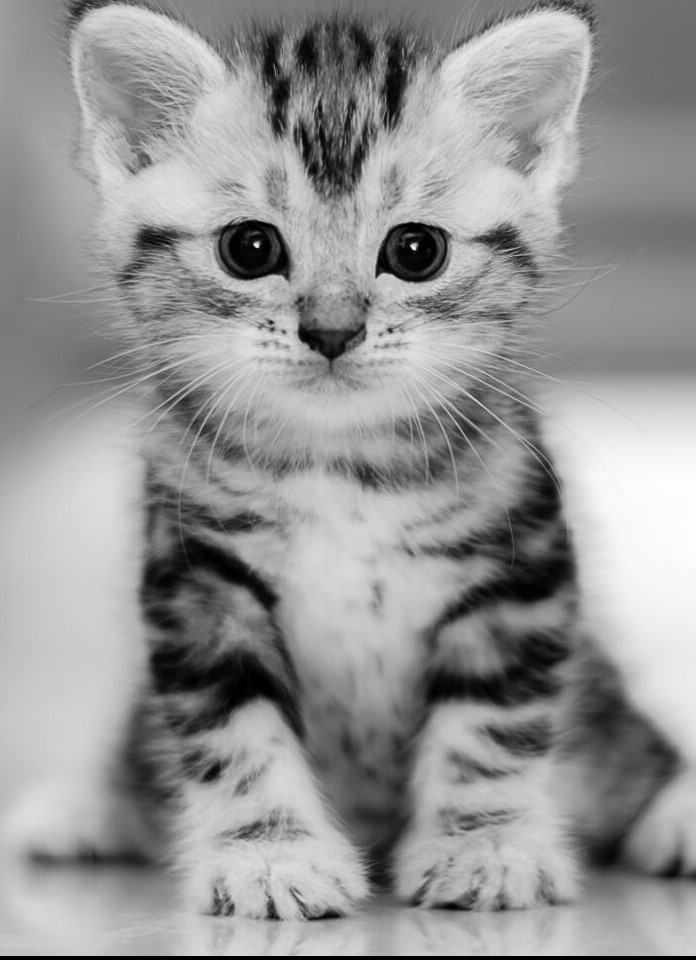

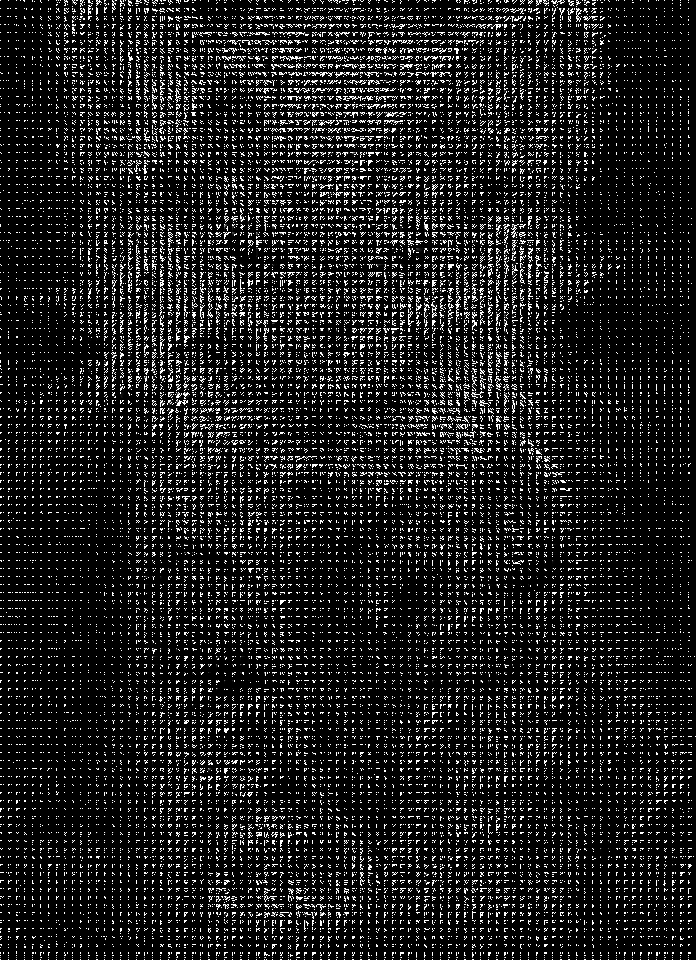

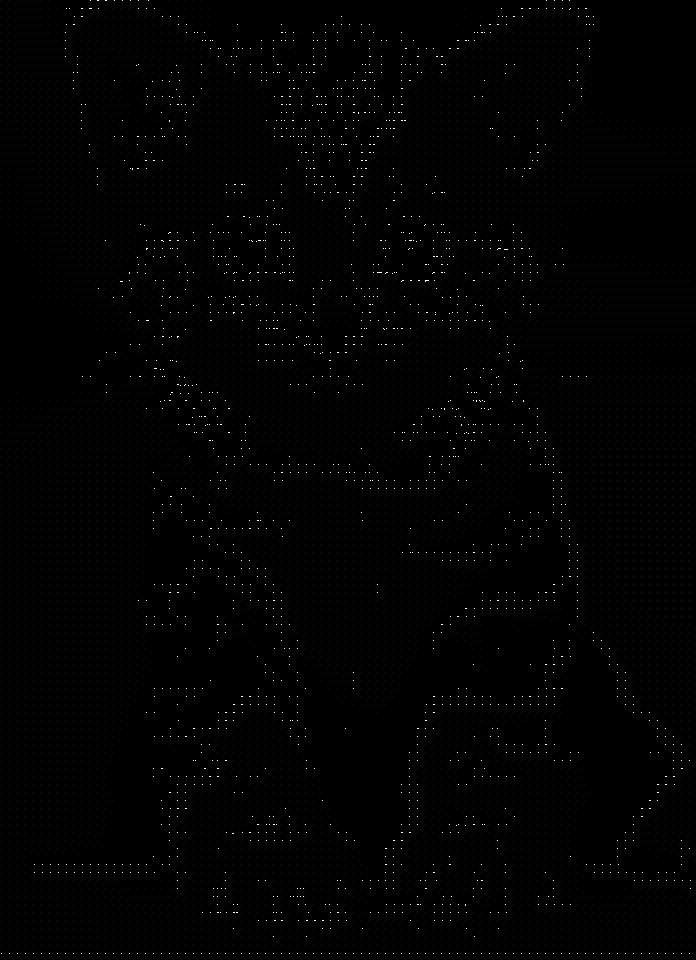

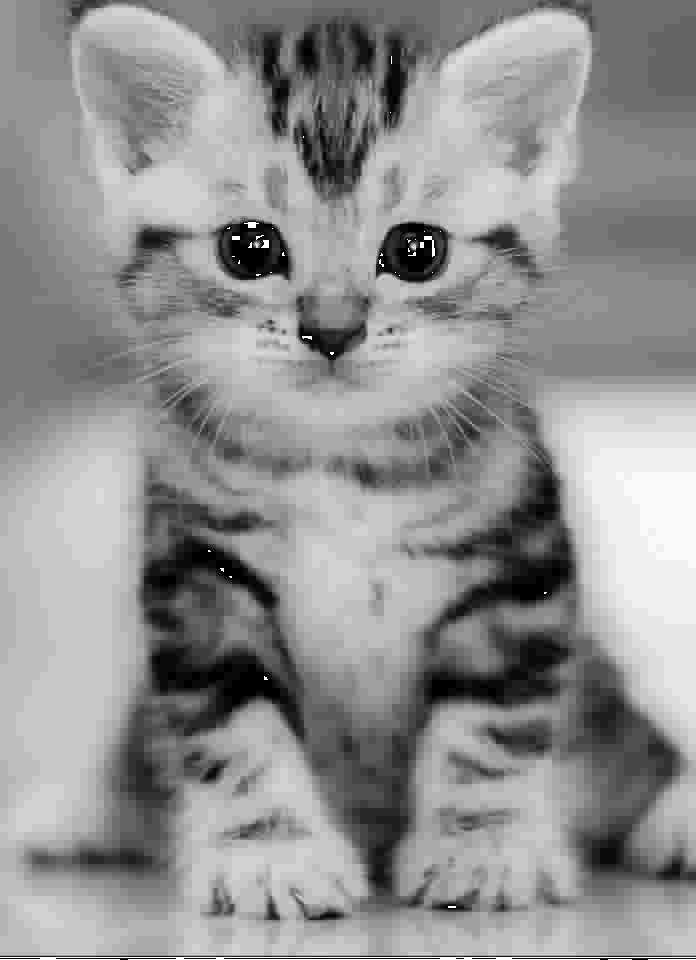

In [6]:
 # Quantization Matrix  Q10
QUANTIZATION_MAT = np.array([[80,60,50,80,120,200,255,255],[55,60,70,95,130,255,255,255],[70,65,80,120,200,255,255,255 ],[70,85,110,145,255,255,255,255],[90,110,185,255,255,255,255,255],[120,175,255,255,255,255,255,255],[245,255,255,255,255,255,255,255],[255,255,255,255,255,255,255,255]])
compress_DCT(QUANTIZATION_MAT)
